<a href="https://colab.research.google.com/github/sudeep-009/MobilePriceRangePrediction/blob/dev/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [99]:
!conda remove icc_rt --force
!conda install icc_rt --no-deps

/bin/bash: conda: command not found
/bin/bash: conda: command not found


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
%matplotlib inline
!pip install mlxtend


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Dataset**

In [ ]:
mob_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Mobile Price Range Prediction/data_mobile_price_range.csv')

In [35]:
mob_df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc   ram  talk_time  three_g  touch_screen  wifi  \
0        188        2   2  2549         19        0             0     1   
1        136        3   6  2631          7        1             1     0   
2        145        5   6  2603          9        1             1     0   
3        131        6   9  2769         11        1             0     0   
4        141        2  14  1411         15        1             1     0   

   price_range  pixel_dim  screen_dim  
0            1      15120   11.401754  
1            2    1799140   17.262677  
2            2    2167308   11.180340  
3            2    2171776   17.888544  
4            1    1464096    8.246211

In [36]:
mob_df.shape

(2000, 19)

In [ ]:
mob_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
len(mob_df.duplicated())

2000

In [ ]:
for i in mob_df.columns:
  print(i)
  print(mob_df[i].unique())

battery_power
[ 842 1021  563 ... 1139 1467  858]
blue
[0 1]
clock_speed
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim
[0 1]
fc
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g
[0 1]
int_memory
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 126 158 170 161 19

In [ ]:
# replacing value 0 present in sc_w using KNN imputer
from sklearn.impute import KNNImputer
mob_df['sc_w']=mob_df['sc_w'].replace(0,np.nan)
mob_df.isnull().sum()


battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
impute=KNNImputer(n_neighbors=1)
df_filled=impute.fit_transform(mob_df[["sc_w","sc_h"]])
df_filled
Imputed_df = pd.DataFrame(df_filled, columns = ['sc_w','sc_h'])
mob_df.drop(['sc_h','sc_w'], axis=1 ,inplace=True)
mob_df = pd.concat([mob_df,Imputed_df],axis=1)

In [ ]:
mob_df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  talk_time  three_g  \
0        188        2  ...         20       756  2549         19        0   
1        136        3  ...        905      1988  2631          7        1   
2        145        5  ...       1263      1716  2603          9        1   
3        131        6  ...       1216      1786  2769         11        1   
4        141        2  ...       1208      1212  1411         15        1   

   touch_screen  wifi  price_range  sc_w  sc_h  
0             0     1            1   7.0   9.0  
1             1     0            2   3.0  17.0  
2             1     0            2   2.0  11.0  
3             0     0            2   8.0  16.0  
4             1     0            1   2.0   8.0  

[5 rows x 21 columns]

In [ ]:
# creating new dimension
mob_df['pixel_dim'] = mob_df['px_height']*mob_df['px_width']
mob_df['screen_dim'] = np.sqrt(mob_df['sc_w']**2 + mob_df['sc_h']**2)

In [ ]:
mob_df.drop(['px_height','px_width','sc_w','sc_h'],inplace=True,axis=1)

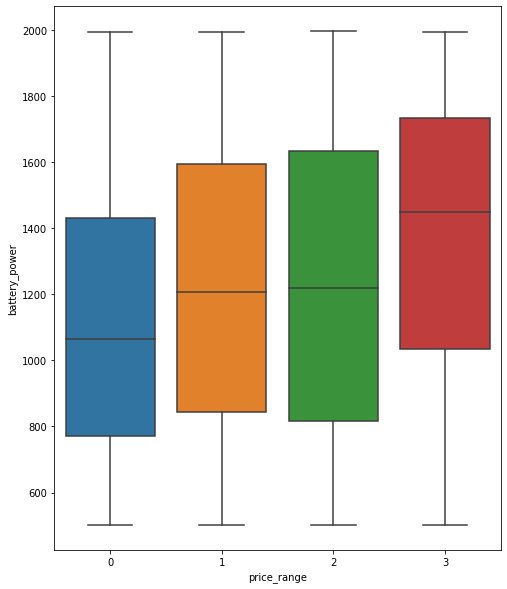

In [37]:
plt.figure(figsize=(8,10))
sns.boxplot(x=mob_df['price_range'],y=mob_df['battery_power'])

plt.show()

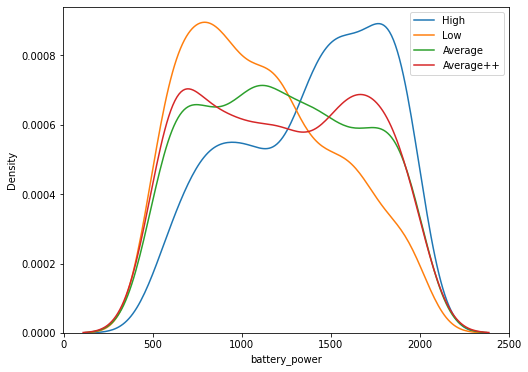

In [61]:
plt.figure(figsize=(8,6))
sns.kdeplot(x=mob_df[mob_df['price_range']==3]['battery_power'],label='High')
sns.kdeplot(x=mob_df[mob_df['price_range']==0]['battery_power'],label='Low')
sns.kdeplot(x=mob_df[mob_df['price_range']==1]['battery_power'],label='Average')
sns.kdeplot(x=mob_df[mob_df['price_range']==2]['battery_power'],label='Average++')
plt.legend()
plt.show()

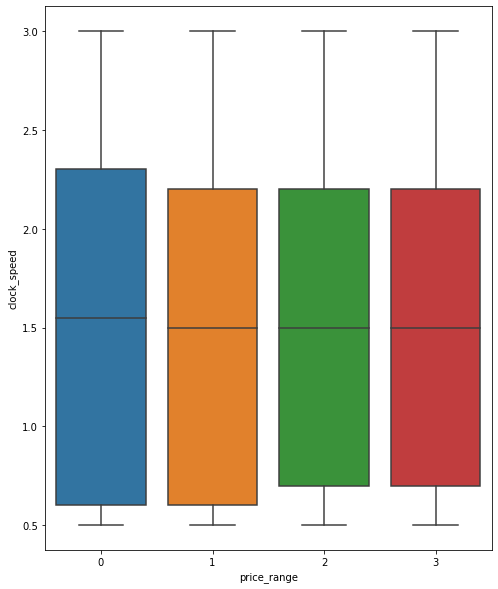

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(x=mob_df['price_range'],y=mob_df['clock_speed'])

plt.show()

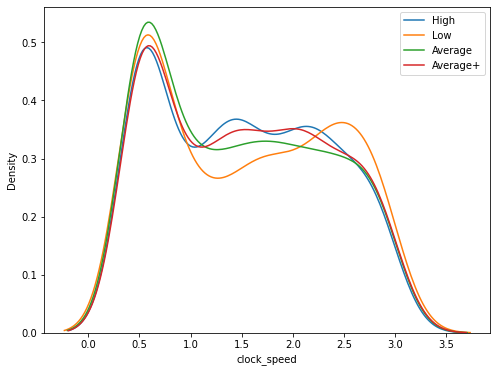

In [62]:
plt.figure(figsize=(8,6))
sns.kdeplot(x=mob_df[mob_df['price_range']==3]['clock_speed'],label='High')
sns.kdeplot(x=mob_df[mob_df['price_range']==0]['clock_speed'],label='Low')
sns.kdeplot(x=mob_df[mob_df['price_range']==1]['clock_speed'],label='Average')
sns.kdeplot(x=mob_df[mob_df['price_range']==2]['clock_speed'],label='Average+')
plt.legend()
plt.show()

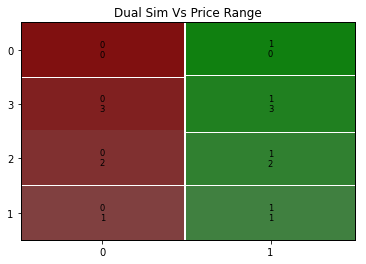

In [66]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(mob_df, ['dual_sim', 'price_range'], title='Dual Sim Vs Price Range')
plt.show()

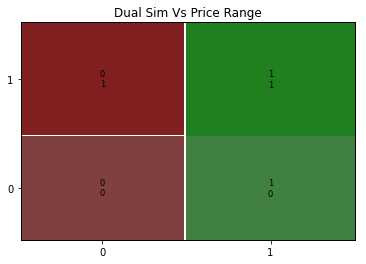

In [67]:
mosaic(mob_df, ['dual_sim', 'four_g'], title='Dual Sim Vs Price Range')
plt.show()

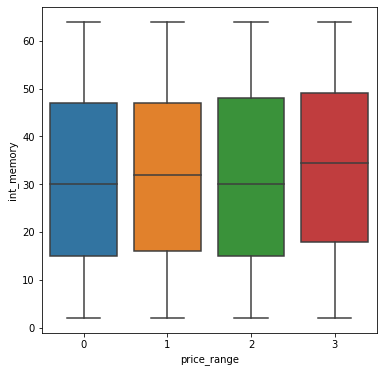

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x=mob_df['price_range'],y=mob_df['int_memory'])
plt.show()

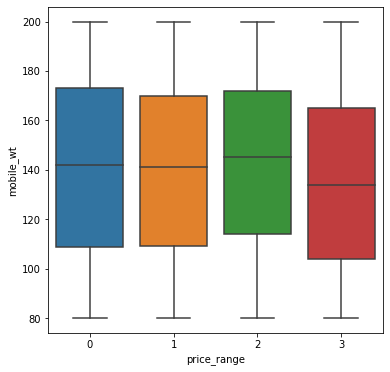

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x=mob_df['price_range'],y=mob_df['mobile_wt'])
plt.show()

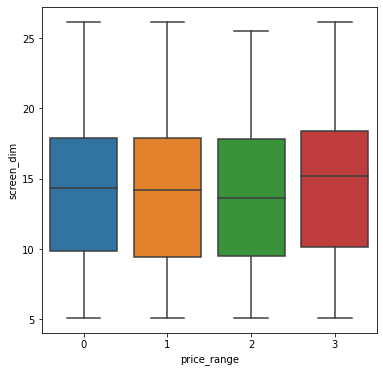

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x=mob_df['price_range'],y=mob_df['screen_dim'])
plt.show()

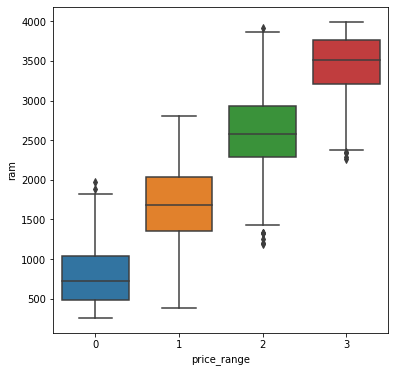

In [63]:
plt.figure(figsize=(6,6))
sns.boxplot(x=mob_df['price_range'],y=mob_df['ram'])
plt.show()

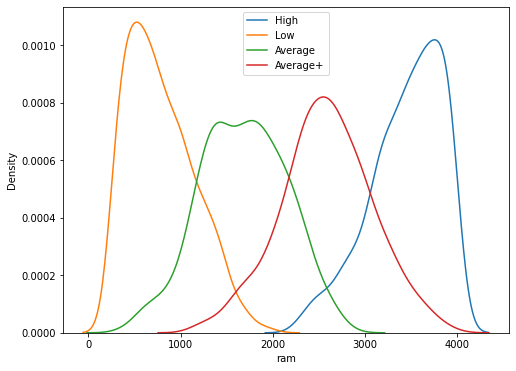

In [65]:
plt.figure(figsize=(8,6))
sns.kdeplot(x=mob_df[mob_df['price_range']==3]['ram'],label='High')
sns.kdeplot(x=mob_df[mob_df['price_range']==0]['ram'],label='Low')
sns.kdeplot(x=mob_df[mob_df['price_range']==1]['ram'],label='Average')
sns.kdeplot(x=mob_df[mob_df['price_range']==2]['ram'],label='Average+')
plt.legend()
plt.show()

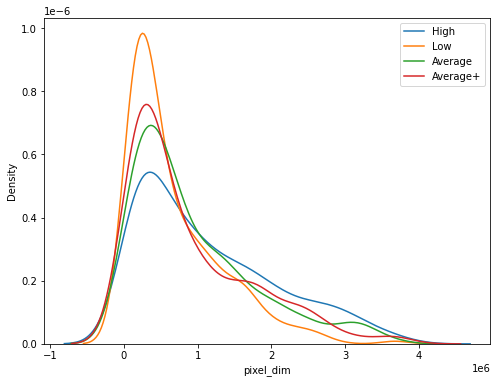

In [68]:
plt.figure(figsize=(8,6))
sns.kdeplot(x=mob_df[mob_df['price_range']==3]['pixel_dim'],label='High')
sns.kdeplot(x=mob_df[mob_df['price_range']==0]['pixel_dim'],label='Low')
sns.kdeplot(x=mob_df[mob_df['price_range']==1]['pixel_dim'],label='Average')
sns.kdeplot(x=mob_df[mob_df['price_range']==2]['pixel_dim'],label='Average+')
plt.legend()
plt.show()

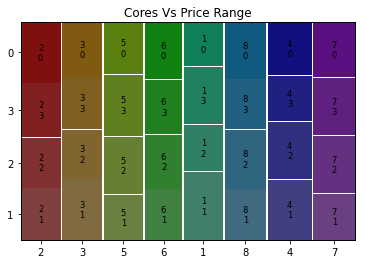

In [69]:
mosaic(mob_df, ['n_cores', 'price_range'], title='Cores Vs Price Range')
plt.show()

**Continuous Input features**

In [71]:
continuous = ['battery_power','clock_speed', 'int_memory','mobile_wt','pixel_dim','ram','screen_dim','pc','fc','talk_time','m_dep']
df_cont = mob_df[continuous]

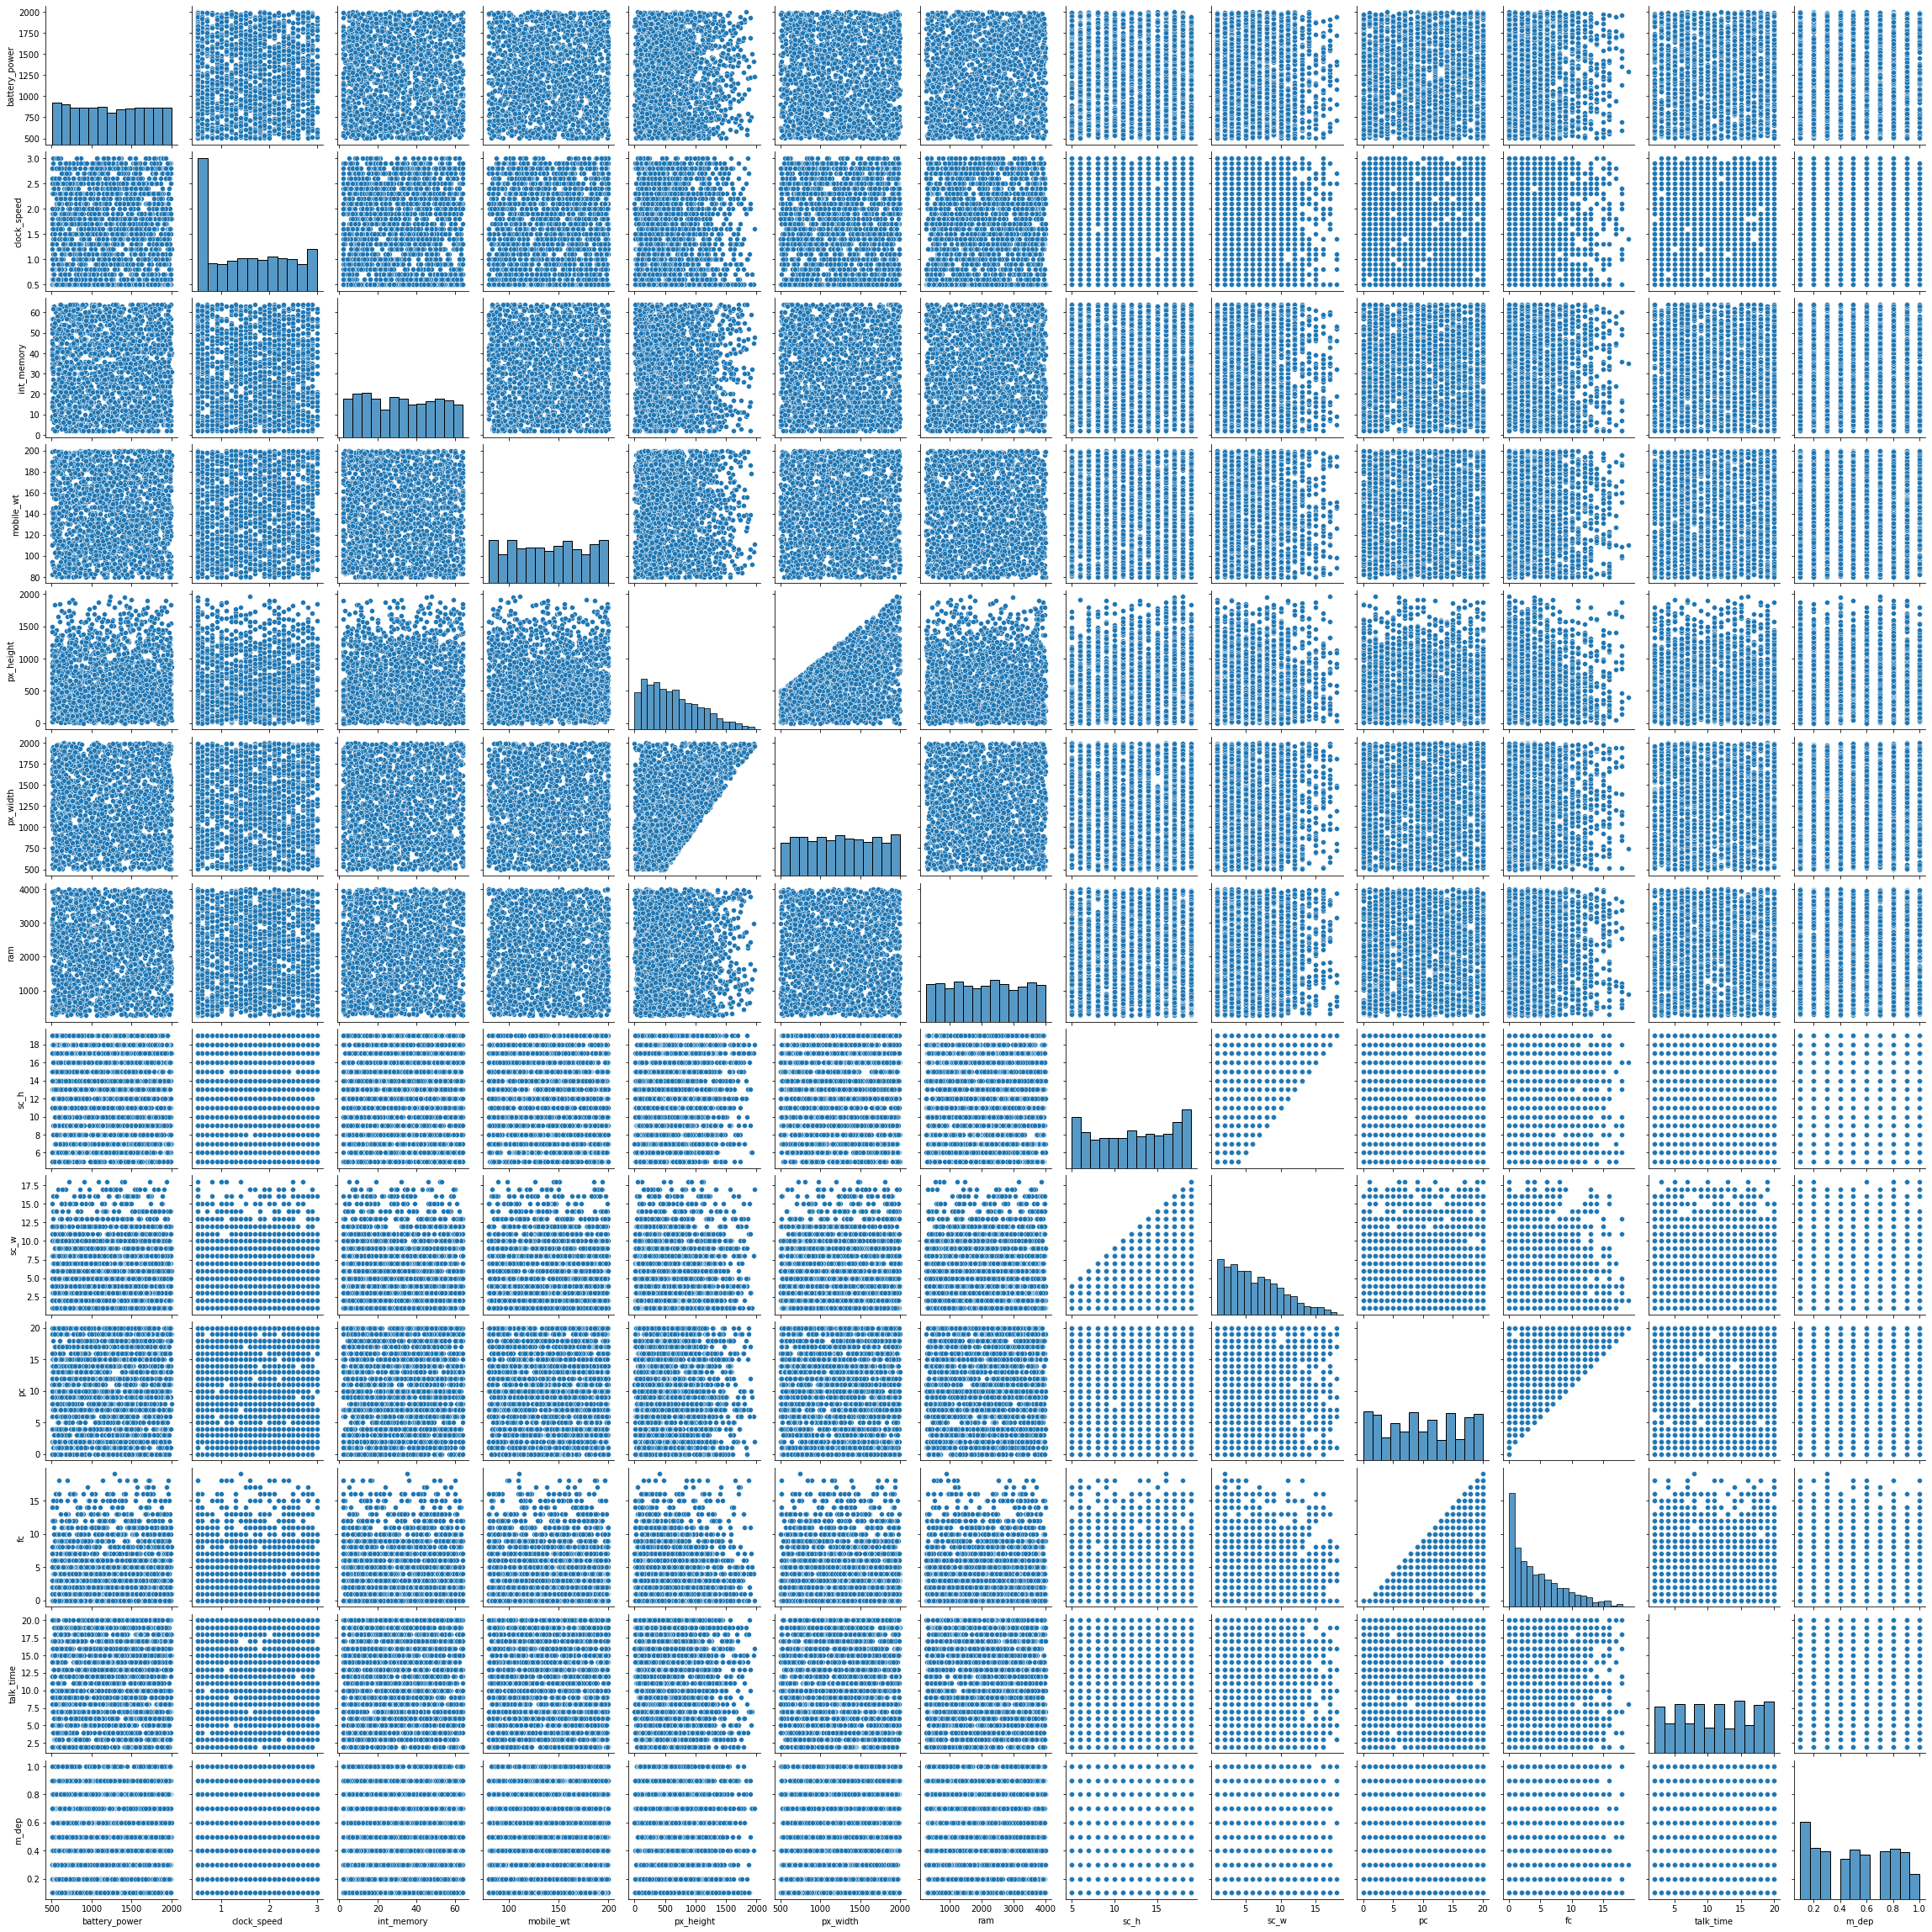

In [ ]:
sns.pairplot(df_cont)

**Calculating Vif for continuous features**

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_cont.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_cont.values, i)
                          for i in range(len(df_cont.columns))]

In [73]:
vif_data

feature        VIF
0   battery_power   7.800616
1     clock_speed   4.184874
2      int_memory   3.889786
3       mobile_wt  11.603941
4       pixel_dim   2.169143
5             ram   4.556789
6      screen_dim   7.320690
7              pc   6.158765
8              fc   3.404261
9       talk_time   4.744784
10          m_dep   3.857704

In [93]:
discrete_features = set(mob_df.columns)-set(continuous)
# dropping price column
discrete_features = [i for i in discrete_features]
disc_df = mob_df[discrete_features]
target = mob_df['price_range']

In [94]:
from sklearn.feature_selection import chi2
resultant = pd.DataFrame(data=[(0 for i in range(len(disc_df.columns))) for i in range(len(disc_df.columns))], 
                         columns=list(disc_df.columns))
resultant.set_index(pd.Index(list(disc_df.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(disc_df.columns):
    for j in list(disc_df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(disc_df[i]).reshape(-1, 1), np.array(disc_df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

               n_cores      blue        four_g      wifi       three_g  \
n_cores       0.000000  0.081911  1.529637e-01  0.631691  4.784526e-01   
blue          0.831676  0.000000  6.692129e-01  0.487165  3.365919e-01   
four_g        0.662110  0.677507  0.000000e+00  0.585697  5.118427e-73   
wifi          0.998838  0.492386  5.800717e-01  0.000000  8.922056e-01   
three_g       0.964836  0.509018  2.737941e-37  0.924907  0.000000e+00   
dual_sim      0.964140  0.270272  9.204993e-01  0.476311  6.608560e-01   
touch_screen  0.962952  0.751099  5.972661e-01  0.707119  6.608188e-01   
price_range   0.815361  0.400974  5.464737e-01  0.443149  3.350841e-01   

              dual_sim  touch_screen  price_range  
n_cores       0.235500      0.252712     0.028022  
blue          0.263305      0.749170     0.867726  
four_g        0.921475      0.604173     0.677300  
wifi          0.475189      0.708246     0.935642  
three_g       0.759657      0.761159     0.954748  
dual_sim      0.00000

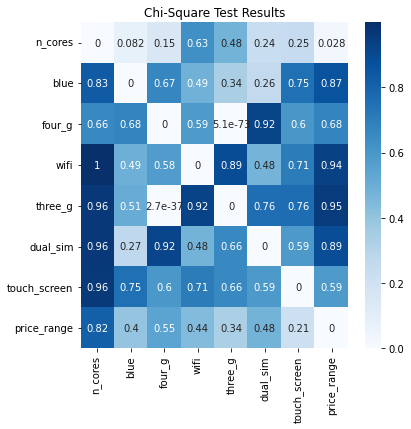

In [101]:
# Plotting a heatmap
fig = plt.figure(figsize=(6,6))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

In [102]:
# dropping 3g
disc_df.drop('three_g',axis=1,inplace=True)

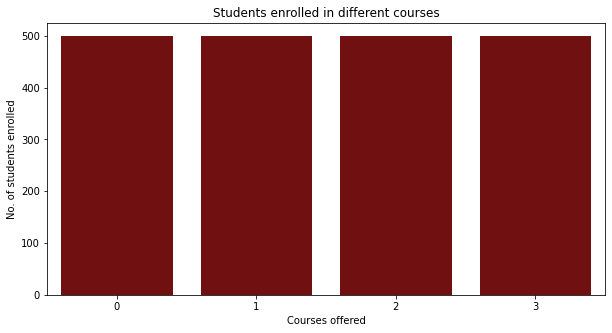

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
sns.countplot(mob_df['price_range'], color ='maroon')
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

In [ ]:
# removing 3g as it is highly multicollinear with 4g
disc_df.drop('three_g',axis=1,inplace=True)

In [ ]:
final_df = pd.concat([df_cont,disc_df],axis=1)

In [ ]:
final_df.head()

battery_power  clock_speed  int_memory  px_height   ram  sc_h  sc_w  pc  \
0            842          2.2           7         20  2549   9.0   7.0   2   
1           1021          0.5          53        905  2631  17.0   3.0   6   
2            563          0.5          41       1263  2603  11.0   2.0   6   
3            615          2.5          10       1216  2769  16.0   8.0   9   
4           1821          1.2          44       1208  1411   8.0   2.0  14   

   fc  talk_time  m_dep  wifi  dual_sim  four_g  touch_screen  n_cores  blue  
0   1         19    0.6     1         0       0             0        2     0  
1   0          7    0.7     0         1       1             1        3     1  
2   2          9    0.9     0         1       1             1        5     1  
3   0         11    0.8     0         0       0             0        6     1  
4  13         15    0.6     0         0       1             1        2     1

In [103]:
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


ImportError: ignored

In [83]:
# train test split
X = mob_df[[i for i in mob_df.columns if i != 'price_range']]
Y = mob_df['price_range']

In [84]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.8,random_state=42)

In [85]:
scale = MinMaxScaler()
train_scale_X = scale.fit_transform(train_X)
test_scale_X = scale.fit_transform(test_X)

In [86]:
logreg = LogisticRegression(solver='saga',multi_class='auto', random_state=42,n_jobs=1)
logreg.fit(train_scale_X,train_Y)

LogisticRegression(n_jobs=1, random_state=42, solver='saga')

In [89]:
pred_Ytrain = logreg.predict(train_scale_X)

In [90]:
target_names = ['0','1','2','3']
print(classification_report(train_Y,pred_Ytrain,target_names=target_names))

              precision    recall  f1-score   support

           0       0.86      0.94      0.89        95
           1       0.81      0.76      0.78       105
           2       0.84      0.74      0.78       103
           3       0.87      0.95      0.91        97

    accuracy                           0.84       400
   macro avg       0.84      0.85      0.84       400
weighted avg       0.84      0.84      0.84       400



In [87]:
pred_Y = logreg.predict(test_scale_X)

In [88]:
confusion_matrix(test_Y,pred_Y)

array([[373,  31,   1,   0],
       [ 57, 243,  95,   0],
       [  0,  57, 254,  86],
       [  0,   0,  32, 371]])

In [ ]:
target_names = ['0','1','2','3']
print(classification_report(test_Y,pred_Y,target_names=target_names))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       405
           1       0.76      0.64      0.70       395
           2       0.70      0.62      0.66       397
           3       0.79      0.92      0.85       403

    accuracy                           0.78      1600
   macro avg       0.78      0.78      0.77      1600
weighted avg       0.78      0.78      0.78      1600



In [ ]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(train_scale_X, train_Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
best_pred = best_clf.predict(test_scale_X)

In [ ]:
target_names = ['0','1','2','3']
print(classification_report(test_Y,best_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       405
           1       0.83      0.79      0.81       395
           2       0.80      0.77      0.78       397
           3       0.86      0.92      0.89       403

    accuracy                           0.85      1600
   macro avg       0.85      0.85      0.85      1600
weighted avg       0.85      0.85      0.85      1600



In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,200))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = RandomizedSearchCV(knn_2, param_distributions = hyperparameters, cv=10,random_state=42)
#Fit the model
best_model = clf.fit(train_scale_X,train_Y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

'''Best Hyperparameters Value
From GridSearch, it can be seen that the best number of leaf_size is 5 while the optimal distance method is Manhattan or p = 1.
Then the most optimal number of K is 7.

New Classification Report

New ROC Score
Using Hyperparameters Tuning can improve model performance by about 20% to a range of 77% for all evaluation matrices.
The ROC value also increased to 76%.
But even though the performance has improved at 77%, I am not sure about my model and will make some modifications that I will share next week. 
One of the things I will do is rescaling using StandardScalar.

Thank you for reading this story until the end, if there are criticisms or suggestions you can immediately comment and if the story is useful 
 can clap or share it!'''



Best leaf_size: 14
Best p: 1
Best n_neighbors: 109


'Best Hyperparameters Value\nFrom GridSearch, it can be seen that the best number of leaf_size is 5 while the optimal distance method is Manhattan or p = 1.\nThen the most optimal number of K is 7.\n\nNew Classification Report\n\nNew ROC Score\nUsing Hyperparameters Tuning can improve model performance by about 20% to a range of 77% for all evaluation matrices.\nThe ROC value also increased to 76%.\nBut even though the performance has improved at 77%, I am not sure about my model and will make some modifications that I will share next week. \nOne of the things I will do is rescaling using StandardScalar.\n\nThank you for reading this story until the end, if there are criticisms or suggestions you can immediately comment and if the story is useful \n can clap or share it!'

In [ ]:
yPred = best_model.predict(test_scale_X)
target_names = ['0','1','2','3']
print(classification_report(test_Y,yPred,target_names=target_names))
# print(classification_report(train_Y,best_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.75      0.54      0.63       405
           1       0.42      0.58      0.49       395
           2       0.44      0.52      0.47       397
           3       0.75      0.55      0.63       403

    accuracy                           0.55      1600
   macro avg       0.59      0.55      0.56      1600
weighted avg       0.59      0.55      0.56      1600



In [ ]:
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000,1200,1500,2000,2200],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(train_scale_X, train_Y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.263 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.263 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.263 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.263 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.263 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.263 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.263 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.263 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.263 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.263 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.263 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 1200, 1500, 2000, 2200],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)

{'C': 2200, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
y_pred = grid.predict(test_scale_X)

In [ ]:
target_names = ['0','1','2','3']
print(classification_report(test_Y,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       405
           1       0.85      0.86      0.85       395
           2       0.83      0.78      0.80       397
           3       0.86      0.94      0.90       403

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.87      1600
weighted avg       0.88      0.88      0.88      1600



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# random forest classifier with hyperparameter tuning
grid_param = {'bootstrap': [True,False],
 'criterion': ['gini','entropy'],
 'max_depth': [int(x) for x in np.linspace(10, 200, num = 11)],
 'max_features': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
 'min_samples_leaf': [1,2,3,4,5,6,7,8],
 'min_samples_split': [2, 5, 10, 14, 18,35],
 'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]}
rf = RandomForestClassifier()
# Fit the random search model
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid_param, cv = 3)
rf_random.fit(train_scale_X,train_Y)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 29, 48, 67, 86, 105,
                                                      124, 143, 162, 181, 200],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8],
                                        'min_samples_split': [2, 5, 10, 14, 18,
                                                              35],
                                        'n_estimators': [100, 311, 522, 733,
                                                  

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 67,
 'max_features': 0.7,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 522}

In [ ]:
y_pred = rf_random.predict(test_scale_X)

In [ ]:
print(classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       405
           1       0.82      0.82      0.82       395
           2       0.80      0.74      0.77       397
           3       0.85      0.91      0.88       403

    accuracy                           0.85      1600
   macro avg       0.85      0.85      0.85      1600
weighted avg       0.85      0.85      0.85      1600

